In [2]:
import matplotlib as plt
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix , accuracy_score, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import SGD
from imutils import paths
import numpy as np
import pandas as pd
import random
import pickle
import cv2
import os
import time 
import warnings
from tqdm import tqdm_notebook as tqdm
import itertools

warnings.filterwarnings("ignore")
SEED = 42   

In [3]:
!pip install patool
import patoolib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.5/77.5 KB 7.6 MB/s eta 0:00:00


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import os
os.chdir("/content/drive/MyDrive/Deep Learning/1.ANN/ANN")

In [6]:
list(paths.list_images('Pizza Refund'))

['Pizza Refund/test/test_img (25).jpg',
 'Pizza Refund/test/test_img (22).jpg',
 'Pizza Refund/test/test_img (2).jpeg',
 'Pizza Refund/test/test_img (21).jpg',
 'Pizza Refund/test/test_img (3).jpg',
 'Pizza Refund/test/test_img (23).jpg',
 'Pizza Refund/test/test_img (26).jpg',
 'Pizza Refund/test/test_img (10).jpeg',
 'Pizza Refund/test/test_img (5).jpeg',
 'Pizza Refund/test/test_img (16).jpg',
 'Pizza Refund/test/test_img (2).jpg',
 'Pizza Refund/test/test_img (10).jpg',
 'Pizza Refund/test/test_img (4).jpeg',
 'Pizza Refund/test/test_img (13).jpg',
 'Pizza Refund/test/test_img (13).jpeg',
 'Pizza Refund/test/test_img (15).jpg',
 'Pizza Refund/test/test_img (14).jpeg',
 'Pizza Refund/test/test_img (24).jpg',
 'Pizza Refund/test/test_img (27).jpg',
 'Pizza Refund/test/test_img (1).jpg',
 'Pizza Refund/test/test_img (12).jpg',
 'Pizza Refund/test/test_img (18).jpg',
 'Pizza Refund/test/test_img (11).jpg',
 'Pizza Refund/test/test_img (11).jpeg',
 'Pizza Refund/test/test_img (14).jpg',

In [7]:
%%time

print()


CPU times: user 448 µs, sys: 0 ns, total: 448 µs
Wall time: 456 µs


In [8]:
print("[INFO] loading images...")
time1 = time.time()   
data = []
labels = []
classes = ["Good_pizza", "Burnt_pizza"]


imagePaths = sorted(list(paths.list_images('Pizza Refund')))   
random.seed(SEED)
random.shuffle(imagePaths)

# progress bar 
with tqdm(total=len(imagePaths)) as pbar:
    
    # loop over the input images
    for imagePath in imagePaths:
        image = cv2.imread(imagePath)
        image = cv2.resize(image, (32, 32)).flatten()
        data.append(image)


        label = imagePath.split(os.path.sep)[-2]
        
        label = 1 if label == "Good_pizza" else 0
        labels.append(label)
    
        # update the progressbar
        pbar.update(1)

# scale the raw pixel intensities to the range [0, 1]
data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)

print('Time taken: {:.1f} seconds'.format(time.time() - time1))   # to measure time taken
print("done")

[INFO] loading images...


  0%|          | 0/749 [00:00<?, ?it/s]

Time taken: 168.2 seconds
done


In [9]:
print(data)

[[0.25882353 0.29019608 0.46666667 ... 0.45490196 0.59215686 0.76470588]
 [0.2745098  0.34901961 0.44705882 ... 0.3254902  0.34117647 0.71764706]
 [0.45098039 0.53333333 0.64705882 ... 0.8627451  0.88627451 0.89803922]
 ...
 [1.         1.         1.         ... 0.74901961 0.73333333 0.75294118]
 [0.21960784 0.21960784 0.2745098  ... 0.17254902 0.18431373 0.25490196]
 [0.79215686 0.80784314 0.85098039 ... 0.00392157 0.03529412 0.17647059]]


In [10]:
# convert data into dataframe 
pizza = pd.DataFrame(data)
pizza['label'] = labels

In [11]:
pizza.head()

,0,1,2,3,4,5,6,7,8,9,...,3063,3064,3065,3066,3067,3068,3069,3070,3071,label
0,0.258824,0.290196,0.466667,0.349020,0.388235,0.498039,0.654902,0.627451,0.639216,0.196078,...,0.482353,0.611765,0.788235,0.458824,0.596078,0.768627,0.454902,0.592157,0.764706,0
1,0.274510,0.349020,0.447059,0.211765,0.317647,0.419608,0.203922,0.321569,0.419608,0.145098,...,0.792157,0.713725,0.643137,0.192157,0.298039,0.772549,0.325490,0.341176,0.717647,1
2,0.450980,0.533333,0.647059,0.396078,0.501961,0.635294,0.384314,0.490196,0.635294,0.364706,...,0.772549,0.827451,0.850980,0.839216,0.862745,0.870588,0.862745,0.886275,0.898039,1
3,0.011765,0.019608,0.015686,0.031373,0.023529,0.019608,0.003922,0.003922,0.003922,0.011765,...,0.733333,0.701961,0.635294,0.717647,0.678431,0.607843,0.698039,0.654902,0.576471,0
4,0.258824,0.403922,0.505882,0.254902,0.403922,0.501961,0.270588,0.427451,0.541176,0.270588,...,0.572549,0.772549,0.850980,0.525490,0.725490,0.803922,0.525490,0.721569,0.800000,0


In [12]:
pizza.shape

(749, 3073)

In [13]:
# splitting the model into train and test
(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.2, random_state=SEED)

In [14]:
trainX.shape 

(599, 3072)

In [15]:
trainY.shape

(599,)

In [16]:
testX.shape

(150, 3072)

In [17]:
testY.shape

(150,)

In [18]:
trainX

array([[0.98039216, 1.        , 0.99215686, ..., 0.28235294, 0.2       ,
        0.19607843],
       [0.9372549 , 0.92156863, 0.91764706, ..., 0.99215686, 0.99215686,
        0.99215686],
       [0.03137255, 0.06666667, 0.15686275, ..., 0.00784314, 0.01568627,
        0.03921569],
       ...,
       [0.34117647, 0.28627451, 0.30196078, ..., 0.28235294, 0.25490196,
        0.2745098 ],
       [0.08235294, 0.14117647, 0.21568627, ..., 0.16078431, 0.29019608,
        0.45882353],
       [0.4745098 , 0.45882353, 0.5372549 , ..., 0.5254902 , 0.85098039,
        0.90196078]])

In [19]:
trainY

array([0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,

In [20]:
# convert the labels from integers/categories to vectors 

trainY = to_categorical(trainY, num_classes=2)   
testY = to_categorical(testY, num_classes=2)   

# [0,1] Good_pizza
# [1,0] Burnt_pizza

In [21]:
sample_image = (trainX[14] * 255).astype("int")

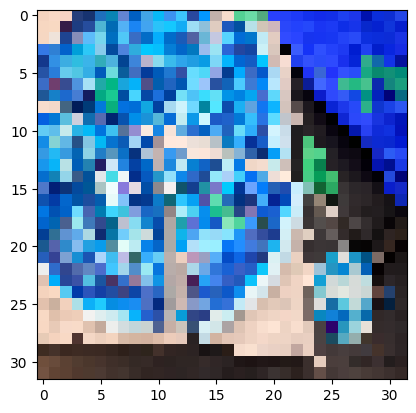

In [22]:
plt.imshow(sample_image.reshape(32,32,3))

In [23]:
trainY[52]   # [0,1] means good_pizza [1,0] means burnt_pizza

array([0., 1.], dtype=float32)

In [24]:
model = Sequential()   

# first hidden layer has 1024 nodes
model.add(Dense(units= 1024, input_shape=(3072,), kernel_initializer = 'uniform', activation="relu"))  

#second hidden layer has 800 nodes
model.add(Dense(units= 800, kernel_initializer = 'uniform', activation="relu"))


# third hidden layer has 512 nodes
model.add(Dense(units=512, kernel_initializer='uniform', activation="relu"))                         

 # output layer with number of possible class labels
model.add(Dense(units=2,kernel_initializer='uniform', activation="sigmoid"))     

In [25]:
INIT_LR = 0.05
opt = SGD(lr=INIT_LR)   
model.compile(loss="binary_crossentropy", optimizer=opt, metrics=["accuracy"] )

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1024)              3146752   
                                                                 
 dense_1 (Dense)             (None, 800)               820000    
                                                                 
 dense_2 (Dense)             (None, 512)               410112    
                                                                 
 dense_3 (Dense)             (None, 2)                 1026      
                                                                 
Total params: 4,377,890
Trainable params: 4,377,890
Non-trainable params: 0
_________________________________________________________________


In [27]:
EPOCHS = 5
H = model.fit(trainX,trainY,validation_data=(testX,testY), epochs=EPOCHS, batch_size=32)

Epoch 1/5
19/19 [==============================] - 5s 14ms/step - loss: 0.6597 - accuracy: 0.5943 - val_loss: 0.6920 - val_accuracy: 0.5000
Epoch 2/5
19/19 [==============================] - 0s 5ms/step - loss: 0.6412 - accuracy: 0.5943 - val_loss: 0.6770 - val_accuracy: 0.5000
Epoch 3/5
19/19 [==============================] - 0s 6ms/step - loss: 0.6275 - accuracy: 0.5943 - val_loss: 0.6707 - val_accuracy: 0.5000
Epoch 4/5
19/19 [==============================] - 0s 5ms/step - loss: 0.6138 - accuracy: 0.5943 - val_loss: 0.6547 - val_accuracy: 0.5000
Epoch 5/5
19/19 [==============================] - 0s 5ms/step - loss: 0.5996 - accuracy: 0.6110 - val_loss: 0.6371 - val_accuracy: 0.5600


In [28]:
print("[INFO] evaluating network...")
pred_prob = model.predict(testX, batch_size=32)

[INFO] evaluating network...
5/5 [==============================] - 0s 3ms/step


In [29]:
test_y = [ np.argmax(i)  for i in testY]
pred_y = [ np.argmax(i)  for i in pred_prob]

In [30]:
def plot_confusion_metrix(y_true, y_pred,classes,
                         normalize=False,
                         title='Confusion Matrix',
                         cmap=plt.cm.Blues):
    
    cm = confusion_matrix(y_true,y_pred)
    
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized Confusion Matrix")
    else:
        print("Confusion Matrix, Without Normalisation")

    
    plt.imshow(cm, interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks,classes,rotation=35)
    plt.yticks(tick_marks,classes)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() /2.
    
    for i , j in itertools.product(range(cm.shape[0]), range(cm.shape[0])):
        plt.text(j, i, format(cm[i,j], fmt),
                 horizontalalignment='center',
                 color='white' if cm[i, j] > thresh else 'black')
    
    plt.ylabel('Actual Image label')
    plt.xlabel('Each Image Label')
    # plt.tight_layout()
    
    plt.show()
    
    print("-----------------------------------------------------")
    print('Classification report')
    print(classification_report(y_true,y_pred))
    
    print("-----------------------------------------------------")
    acc= accuracy_score(y_true,y_pred)
    print("Accuracy of the model: ", acc)


Confusion Matrix, Without Normalisation


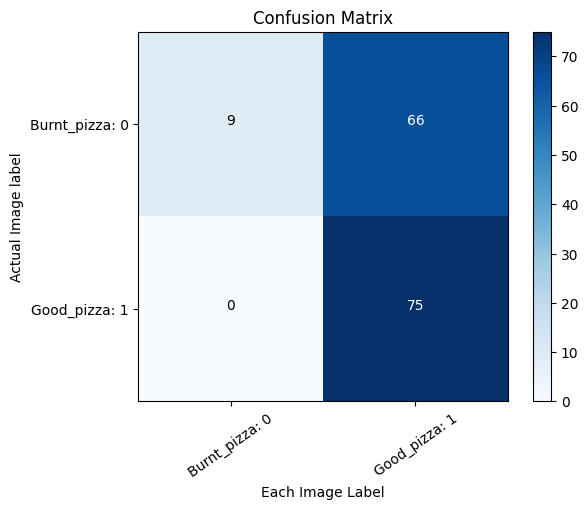

-----------------------------------------------------
Classification report
              precision    recall  f1-score   support

           0       1.00      0.12      0.21        75
           1       0.53      1.00      0.69        75

    accuracy                           0.56       150
   macro avg       0.77      0.56      0.45       150
weighted avg       0.77      0.56      0.45       150

-----------------------------------------------------
Accuracy of the model:  0.56


In [31]:
plot_confusion_metrix(test_y, pred_y, classes=["Burnt_pizza: 0","Good_pizza: 1"])